In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from ipywidgets import widgets 
from pandas_profiling import ProfileReport

In [77]:
df = pd.read_csv(r"qsar_fish_toxicity.csv", names=['CICO','SM1_Dz','GATS1i','NdsCH','NdssC','MLOGP','LC50'],sep=";")
df

,CICO,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


In [4]:
df.head()

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [ ]:
df.info()

In [55]:
df.columns

Index(['CIC0', 'SM1_Dz', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50'], dtype='object')

In [56]:
df.nunique()

CIC0      502
SM1_Dz    186
GATS1i    557
NdsCH       5
NdssC       7
MLOGP     559
LC50      827
dtype: int64

In [57]:
df.shape

(908, 7)

In [58]:
df.isnull().sum()

CIC0      0
SM1_Dz    0
GATS1i    0
NdsCH     0
NdssC     0
MLOGP     0
LC50      0
dtype: int64

In [60]:
df.duplicated().sum()

1

In [61]:
df.loc[df.duplicated(keep='first'), :]

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
560,2.508,0.58,0.941,0,0,1.701,3.799


<AxesSubplot:>

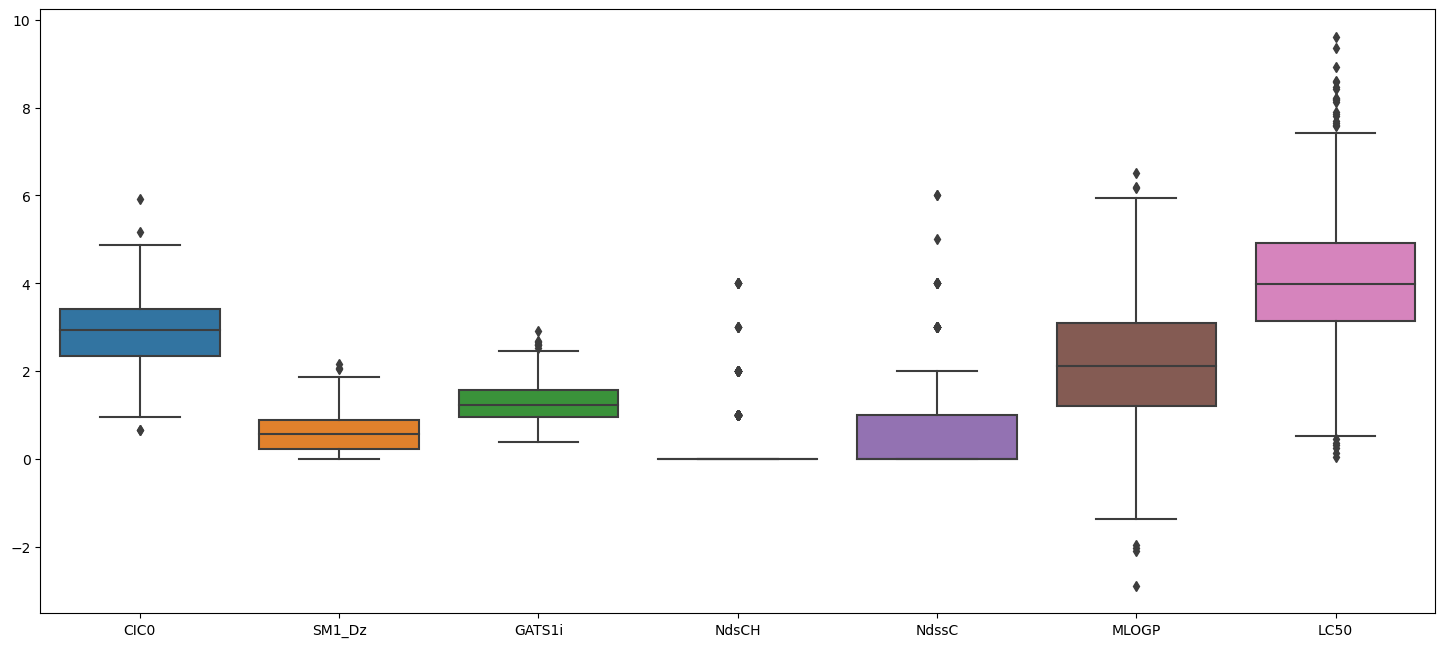

In [63]:
plt.figure(figsize=(18,8), dpi = 100)
sea.boxplot(data=df)

<AxesSubplot:ylabel='Proportion'>

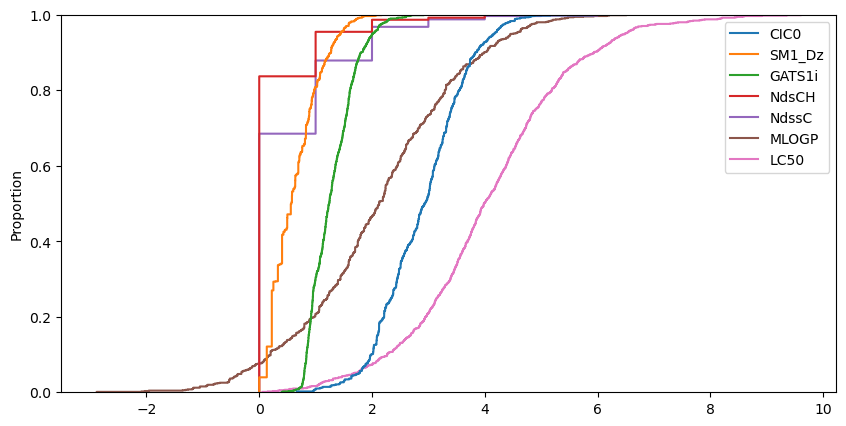

In [65]:
plt.figure(figsize=(10,5), dpi = 100)
sea.ecdfplot(data= df)

<AxesSubplot:ylabel='Density'>

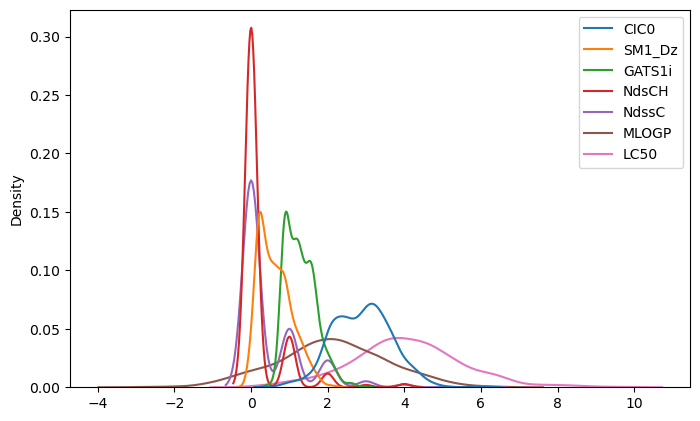

In [66]:
plt.figure(figsize= (8,5), dpi = 100)
sea.kdeplot(data = df)

<AxesSubplot:>

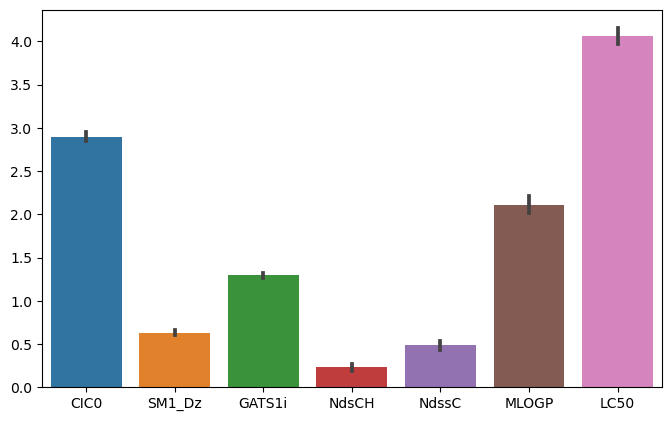

In [67]:
plt.figure(figsize= (8,5), dpi = 100)
sea.barplot(data = df)

<Figure size 800x500 with 0 Axes>

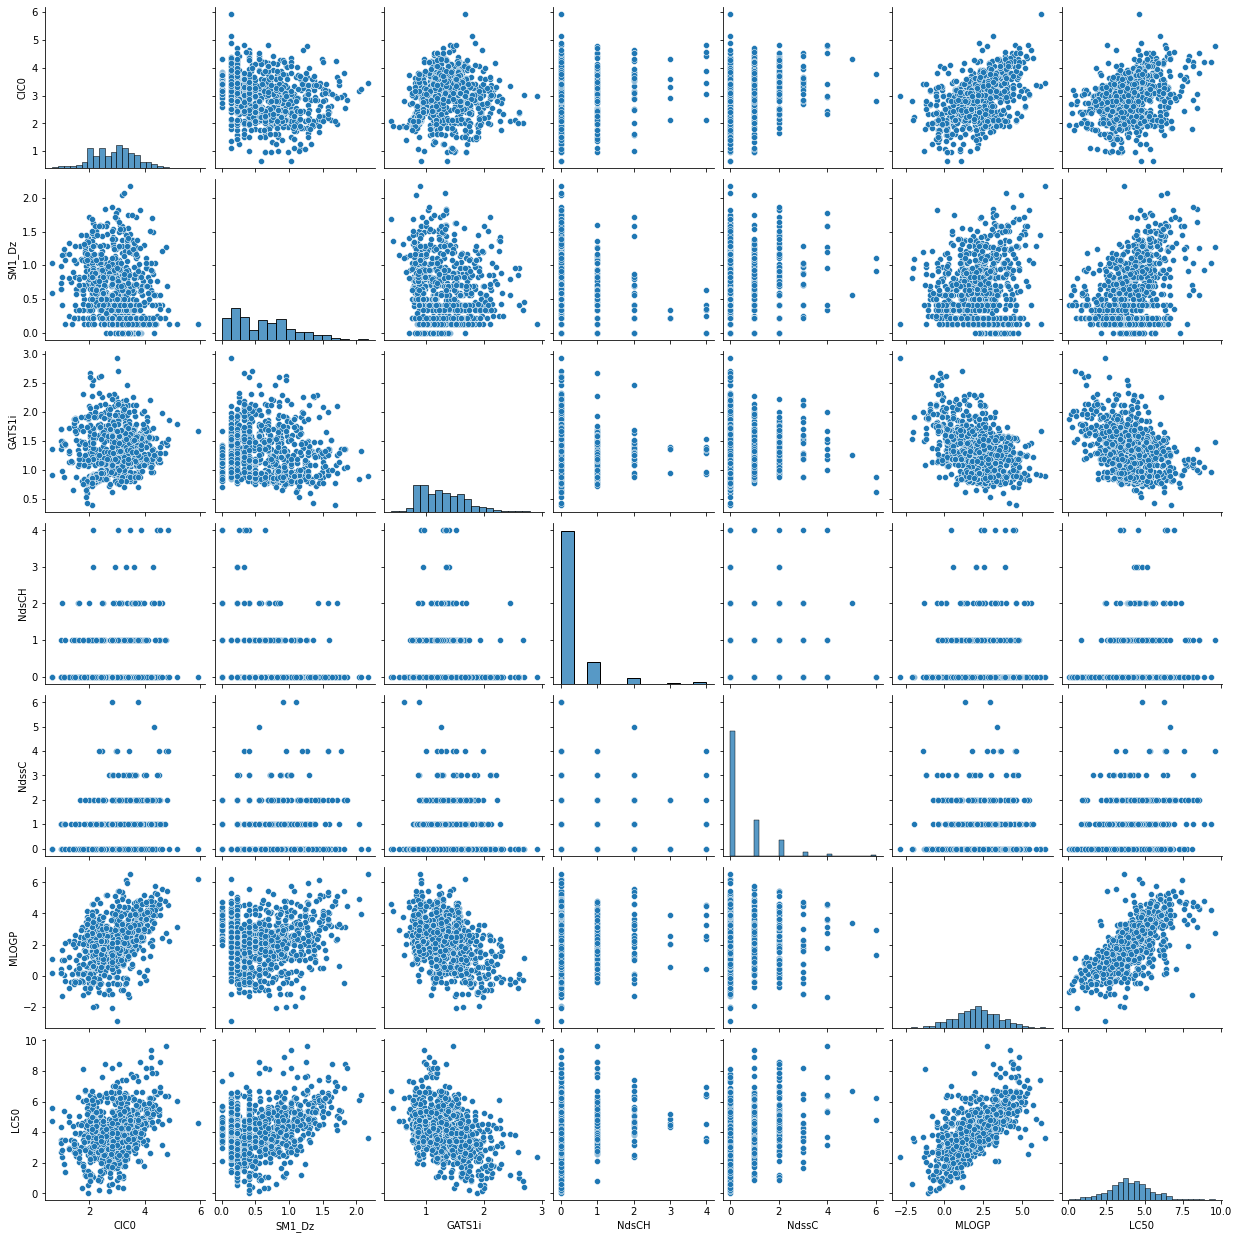

In [68]:
plt.figure(figsize= (8,5), dpi = 100)
sea.pairplot(data = df)

<AxesSubplot:xlabel='MLOGP', ylabel='LC50'>

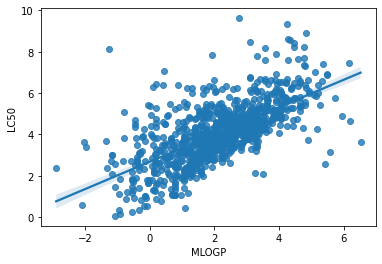

In [71]:
sea.regplot(x=df['MLOGP'], y=df['LC50'])

<AxesSubplot:xlabel='GATS1i', ylabel='LC50'>

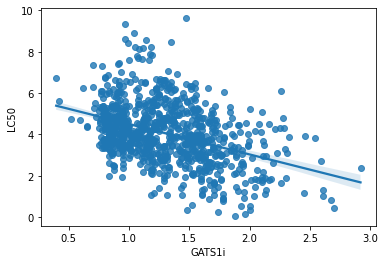

In [72]:
sea.regplot(x=df['GATS1i'], y=df['LC50'])

<AxesSubplot:xlabel='SM1_Dz', ylabel='LC50'>

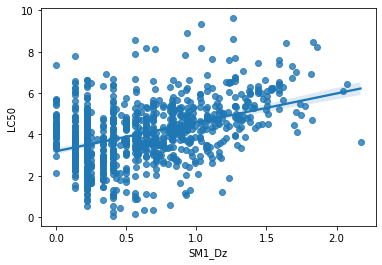

In [74]:
sea.regplot(x=df['SM1_Dz'], y=df['LC50'])

<AxesSubplot:xlabel='CIC0', ylabel='LC50'>

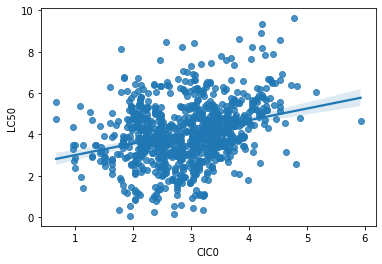

In [76]:
sea.regplot(x=df['CICO'], y=df['LC50'])

In [78]:
# Generate the Profiling Report
profile = ProfileReport(
    df, title="QSAR Dataset", html={"style": {"full_width": True}}
)

In [79]:
# The Notebook Widgets Interface
profile.to_widgets()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("final_eda.html")

In [ ]:
profile

In [ ]:
#K-Nearest Neighbours Model

In [5]:
X = df.iloc[:, :6].values
y = df.iloc[:, 6].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=11)

In [9]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

In [10]:
rmse_value = []
for K in range(2,20):
    K = K+1
    KNR_model = neighbors.KNeighborsRegressor(n_neighbors= K)

    KNR_model.fit(X_train, y_train)

    pred = KNR_model.predict(X_test)

    error = sqrt(mean_squared_error(y_test, pred))

    rmse_value.append(error)

    print('Root Mean Squared Error value for K = ', K , ' is ', error)


Root Mean Squared Error value for K =  3  is  1.0327934139640693
Root Mean Squared Error value for K =  4  is  0.9736241325798424
Root Mean Squared Error value for K =  5  is  0.9726398556560247
Root Mean Squared Error value for K =  6  is  0.9618154489207753
Root Mean Squared Error value for K =  7  is  0.9668392902917323
Root Mean Squared Error value for K =  8  is  0.9730635280452062
Root Mean Squared Error value for K =  9  is  0.9735635503202705
Root Mean Squared Error value for K =  10  is  0.9643988536610416
Root Mean Squared Error value for K =  11  is  0.9711221195306045
Root Mean Squared Error value for K =  12  is  0.9812891774901401
Root Mean Squared Error value for K =  13  is  0.9850722979758375
Root Mean Squared Error value for K =  14  is  0.9771879503909591
Root Mean Squared Error value for K =  15  is  0.9797399817879496
Root Mean Squared Error value for K =  16  is  0.9842520069481406
Root Mean Squared Error value for K =  17  is  0.992316179234291
Root Mean Squared 

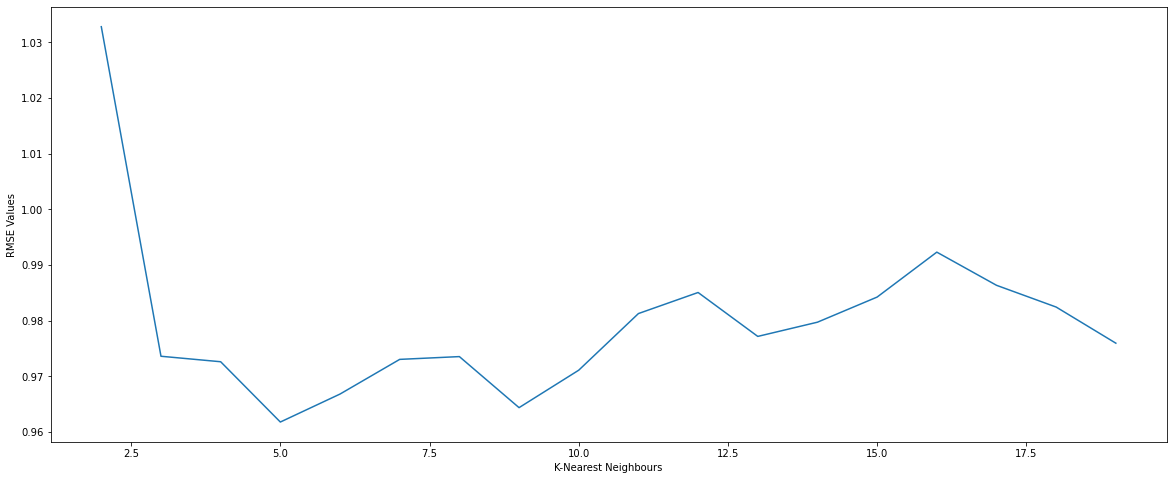

In [11]:
plt.figure(figsize = (20,8))
plt.plot([i for i in range(2,20)], rmse_value)
plt.xlabel("K Neighbors")
plt.ylabel("RMSE Values")
plt.xlabel("K-Nearest Neighbours")
plt.show()


In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [13]:
KNR_model = KNeighborsRegressor(n_neighbors = 2).fit(X_train, y_train)
KNR_training_pred = KNR_model.predict(X_train)
KNR_training_rscore = KNR_model.score(X_train, y_train)
KNR_training_rmse = np.sqrt(mean_squared_error(y_train, KNR_training_pred))

In [14]:
print("R squared for Training data: ", KNR_training_rscore)
print("Root Mean Squared Error for Training data: ", KNR_training_rmse)

R squared for Training data:  0.8664963960072789
Root Mean Squared Error for Training data:  0.5322518525172799


In [15]:
KNR_test_predictions=KNR_model.predict(X_test)
KNR_test_rscore=KNR_model.score(X_test,y_test)
KNR_test_rmse=np.sqrt(mean_squared_error(y_test, KNR_test_predictions))
KNR_test_mae = mean_absolute_error(y_test, KNR_test_predictions)

In [16]:
print("R squared for Testing data: ", KNR_test_rscore)
print("Root Mean Squared Error for Testing data: ", KNR_test_rmse)
print("Mean Absolute Error for Testing data: ",KNR_test_mae)

R squared for Testing data:  0.46262877509590794
Root Mean Squared Error for Testing data:  1.0608646362433418
Mean Absolute Error for Testing data:  0.7447863436123349


In [17]:
residual_train = y_train - KNR_training_pred

residual_test = y_test - KNR_test_predictions

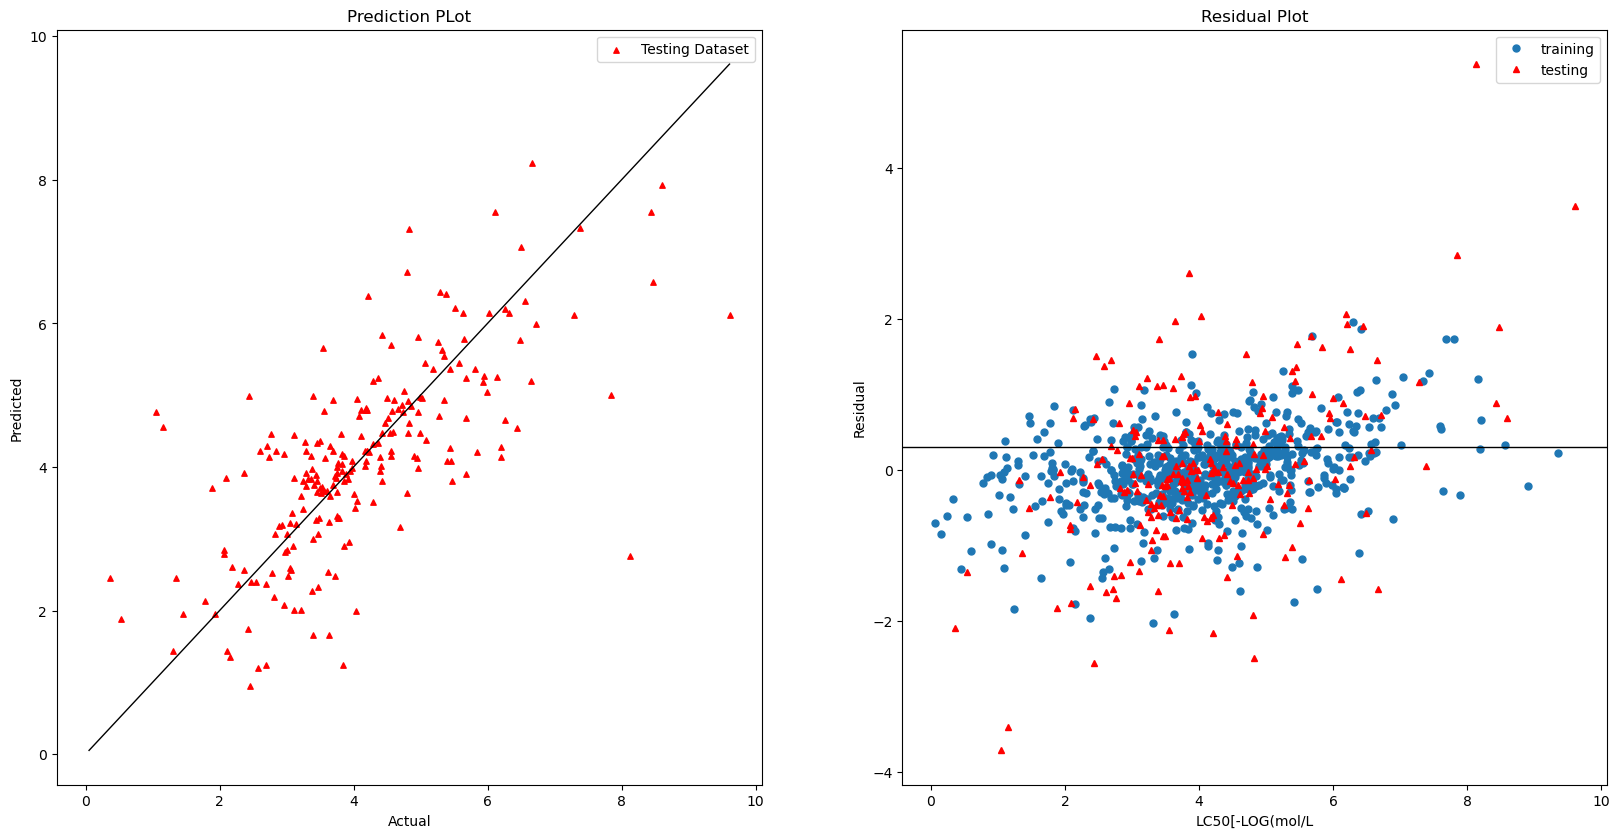

In [22]:
from cProfile import label


fig = plt.figure(figsize=(20,10), dpi = 100)

ax1 = plt.subplot(1,2,1)

ax1.scatter(y_test, KNR_test_predictions, marker = '^', s= 15, c = 'r', label = 'Testing Dataset')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k' , lw=1)
ax1.set_title('Prediction PLot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2 = plt.subplot(1,2,2)

ax2.plot(y_train, residual_train, 'o', markersize = 5, label = 'training')
ax2.plot(y_test, residual_test, '^', c = 'red', markersize = 4, label = 'testing')
ax2.axhline(y = 0.3, linestyle = '-', linewidth = 1, c = 'black')
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50[-LOG(mol/L')
ax2.set_ylabel('Residual')
ax2.legend()

plt.show()

In [ ]:
#XGBoost Model

In [30]:
import xgboost

In [31]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [35]:
xgb_params=[]
depth=[1,3,6,9,12]
for d in depth:
  xgb=xgboost.XGBRegressor(objective ='reg:squarederror',max_depth=d).fit(X_train,y_train)
  xgb_params.append(xgb.score(X_train,y_train))
  print("R Squared value for max_depth ",d,"is ",xgb.score(X_train,y_train))
  p=xgb.predict(X_test)
  print("RMSE for testing max_depth ",d,"is ",np.sqrt(mean_squared_error(y_test,p)))

R Squared value for max_depth  1 is  0.6913970512111147
RMSE for testing max_depth  1 is  1.0043649324465114
R Squared value for max_depth  3 is  0.9118740381418777
RMSE for testing max_depth  3 is  1.006101837848903
R Squared value for max_depth  6 is  0.9851856312889441
RMSE for testing max_depth  6 is  1.0032854602854293
R Squared value for max_depth  9 is  0.9868372850508429
RMSE for testing max_depth  9 is  0.9625396256227734
R Squared value for max_depth  12 is  0.9868391990969402
RMSE for testing max_depth  12 is  0.9826482896965859


In [37]:
xgb_p=xgboost.XGBRegressor(objective='reg:squarederror',max_depth=2).fit(X_train,y_train)

In [38]:
xgb_p_train_rscore=xgb_p.score(X_train,y_train)
xgb_p_train_pred=xgb_p.predict(X_train)
xgb_p_train_rmse=np.sqrt(mean_squared_error(y_train,xgb_p_train_pred))

In [39]:
print("R squared for Training data: ", xgb_p_train_rscore)
print("Root Mean Squared Error for Training data: ", xgb_p_train_rmse)

R squared for Training data:  0.8324854317415407
Root Mean Squared Error for Training data:  0.593140845404437


In [40]:
xgb_p_test_rscore=xgb_p.score(X_test,y_test)

xgb_p_test_pred=xgb_p.predict(X_test)

xgb_p_test_rmse=np.sqrt(mean_squared_error(y_test,xgb_p_test_pred))
xgb_p_test_mae=mean_absolute_error(y_test,xgb_p_test_pred)

In [41]:
print("R squared for Testing data: ", xgb_p_test_rscore)
print("Root Mean Squared Error for Testing data: ", xgb_p_test_rmse)
print("Mean Absolute Error for Testing data: ", xgb_p_test_rmse)

R squared for Testing data:  0.5312375011982926
Root Mean Squared Error for Testing data:  1.010304454497966
Mean Absolute Error for Testing data:  1.010304454497966


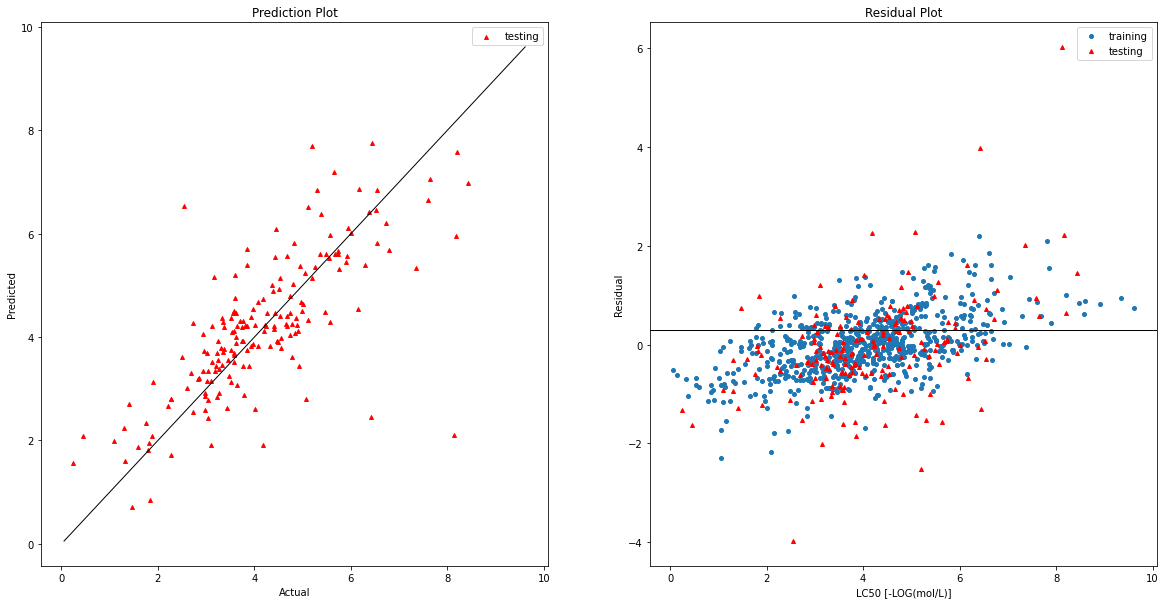

In [42]:
residual_train = y_train - xgb_p_train_pred
residual_test = y_test - xgb_p_test_pred

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, xgb_p_train_pred, s=15, label='training')
ax1.scatter(y_test, xgb_p_test_pred, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

In [54]:
# Random Forest Regressor Model

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=80)

In [46]:
rf=RandomForestRegressor(max_depth=6,max_features=0.4).fit(X_train,y_train)

In [47]:
rf_train_rscore=rf.score(X_train,y_train)
rf_train_pred=rf.predict(X_train)
rf_train_rmse=np.sqrt(mean_squared_error(y_train,rf_train_pred))

In [48]:
print("R squared for Training data: ",rf_train_rscore)
print("Root Mean Squared Error for Training data: ", rf_train_rmse)

R squared for Training data:  0.7815121308338803
Root Mean Squared Error for Training data:  0.6689763809742196


In [50]:
rf_test_rscore=rf.score(X_test,y_test)

rf_test_pred=rf.predict(X_test)

rf_test_rmse=np.sqrt(mean_squared_error(y_test,rf_test_pred))
rf_test_mae=mean_absolute_error(y_test,rf_test_pred)

In [51]:
print("R squared for Testing data: ",rf_test_rscore)
print("Root Mean Squared Error for Testing data: ", rf_test_rmse)
print("Mean Absolute Error for Testing data: ", rf_test_mae)

R squared for Testing data:  0.6086892750333949
Root Mean Squared Error for Testing data:  0.9436162980869143
Mean Absolute Error for Testing data:  0.6923937865320785


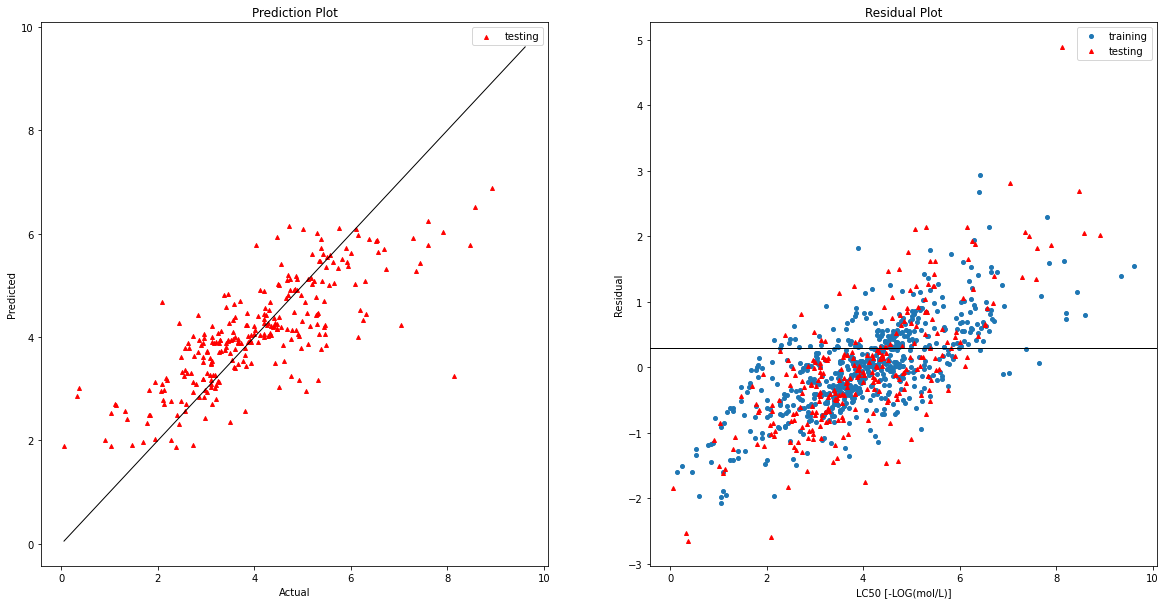

In [52]:
residual_train = y_train - rf_train_pred
residual_test = y_test - rf_test_pred

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, rf_train_pred, s=15, label='training')
ax1.scatter(y_test, rf_test_pred, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

After observing outcomes from three different regressor we see Random Forest Regressor
performs the best with RSME value of 0.94361